<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Neural%20Networks%20for%20Sentiment%20Analysis/W2_rnn_language_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks for Language Modeling

## Traditional Language models

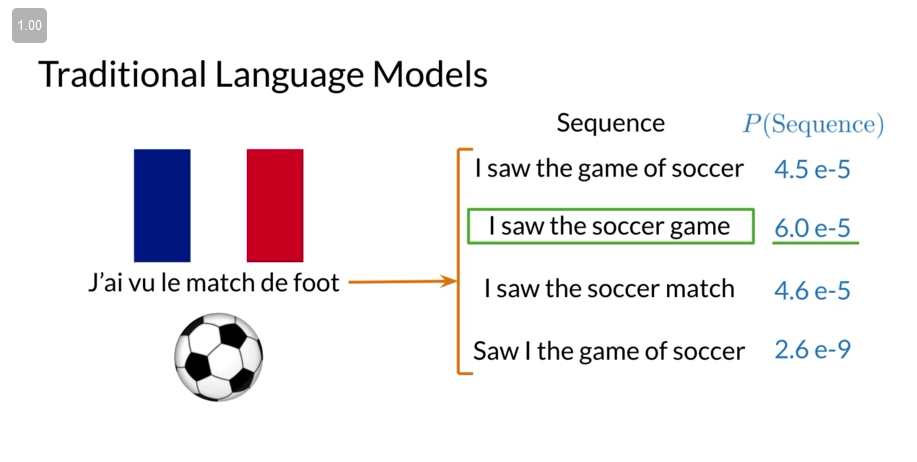

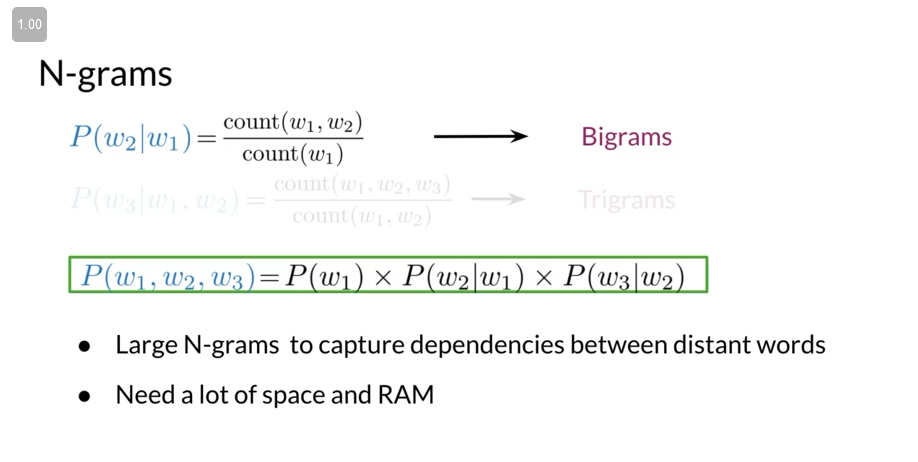

In [2]:
# SECTION DIVIDER

## Recurrent Neural Networks

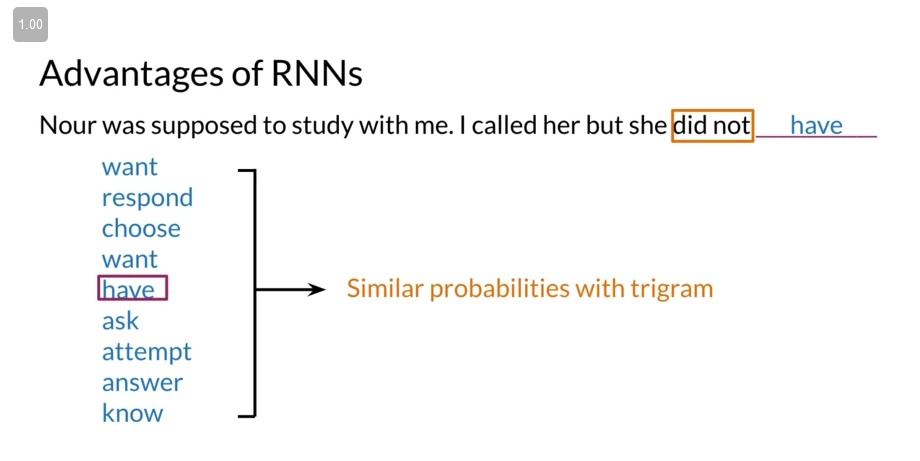

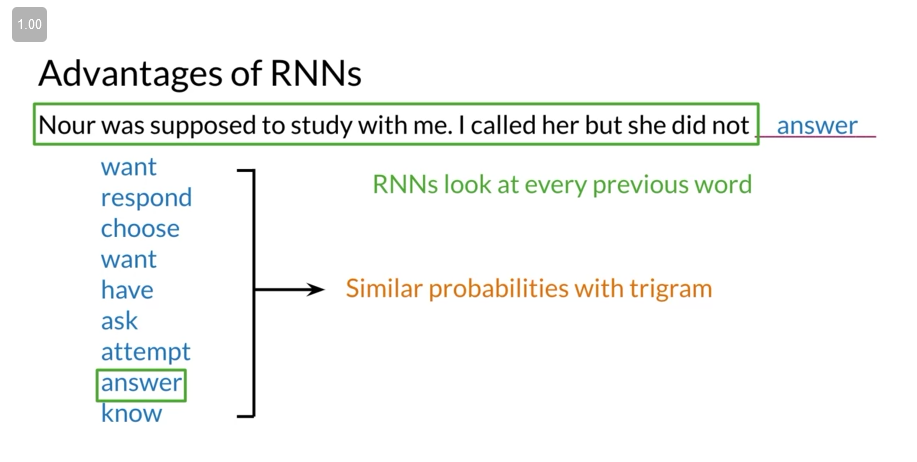

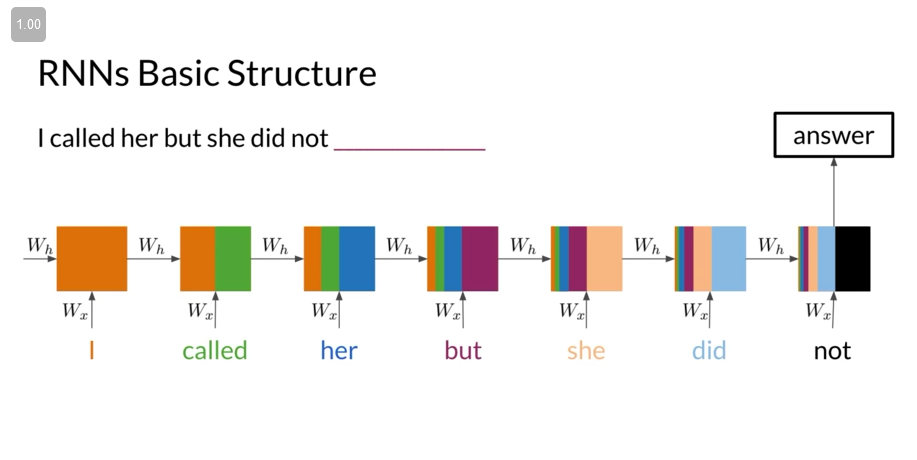

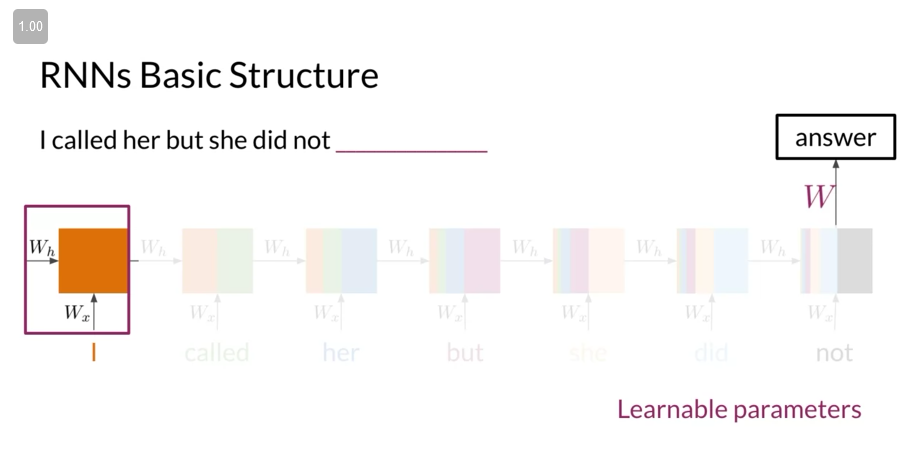

### Summary
- RNNs model relationships among distant words
- In RNNs a lot of computations share parameters

In [3]:
# SECTION DIVIDER

## Applications of RNNs

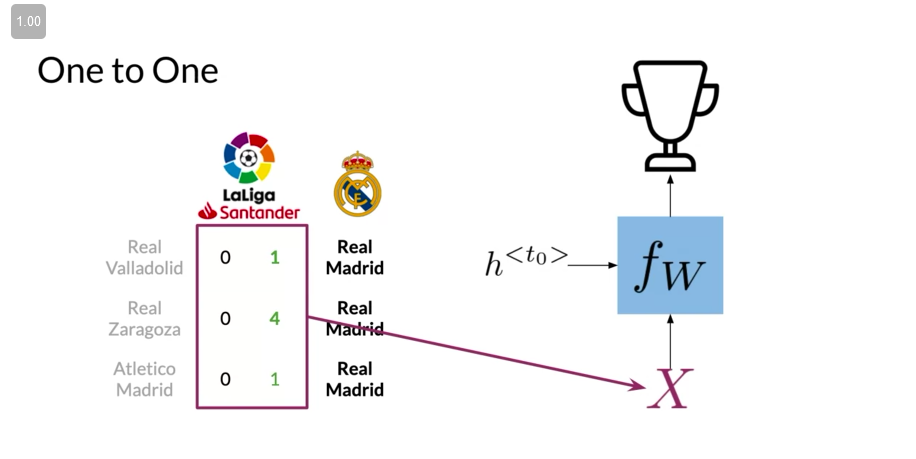

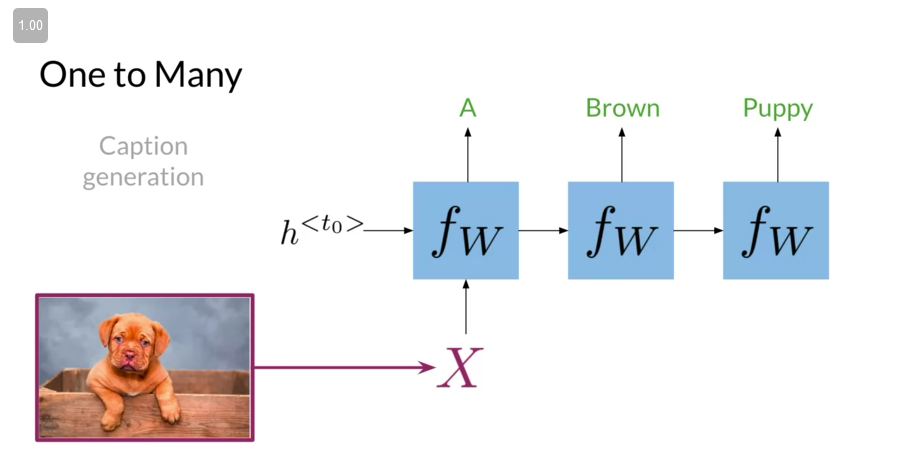

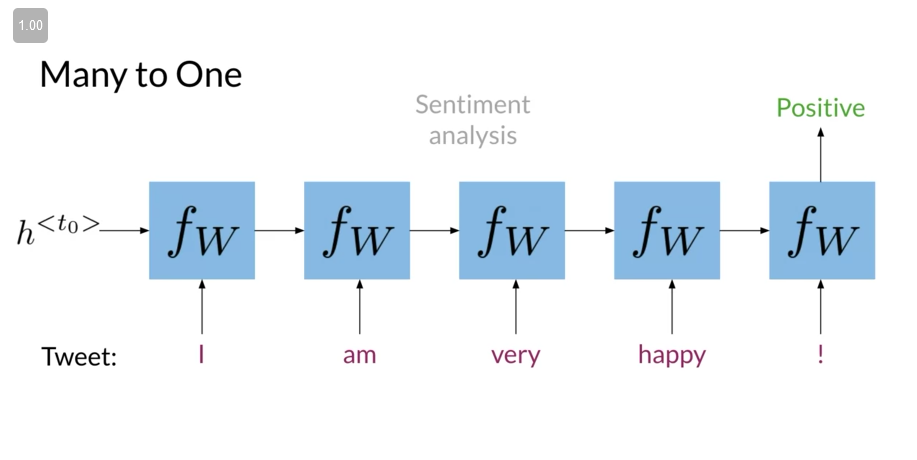

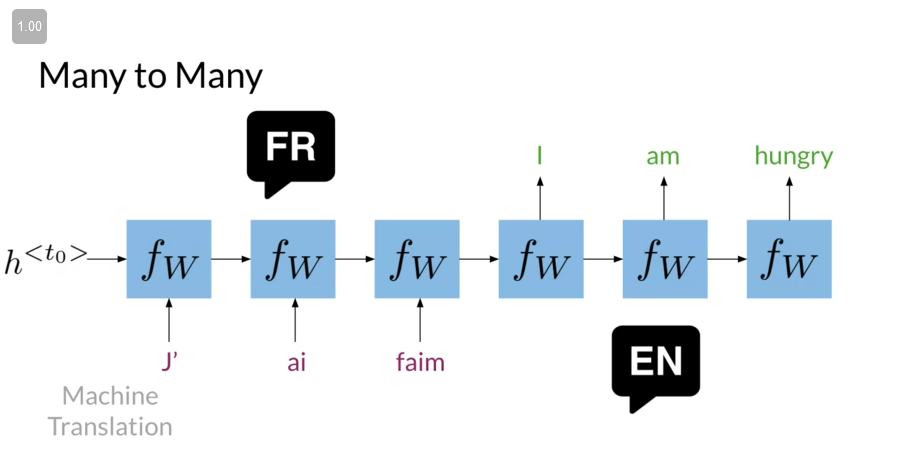

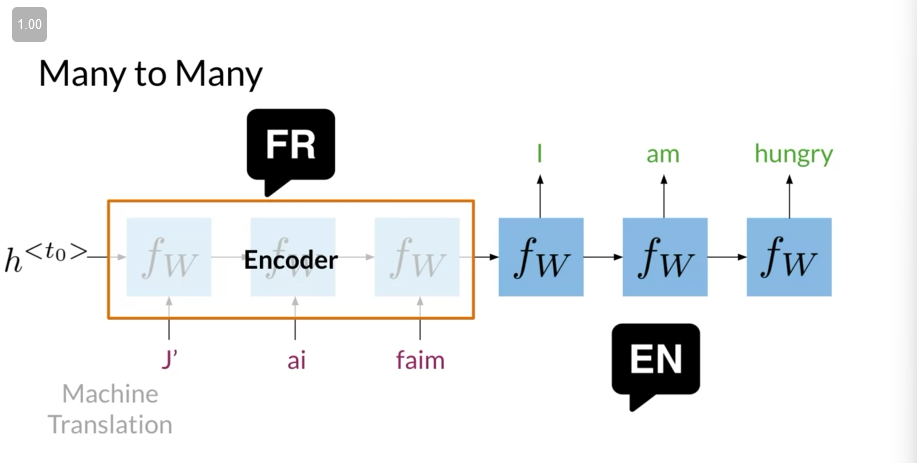

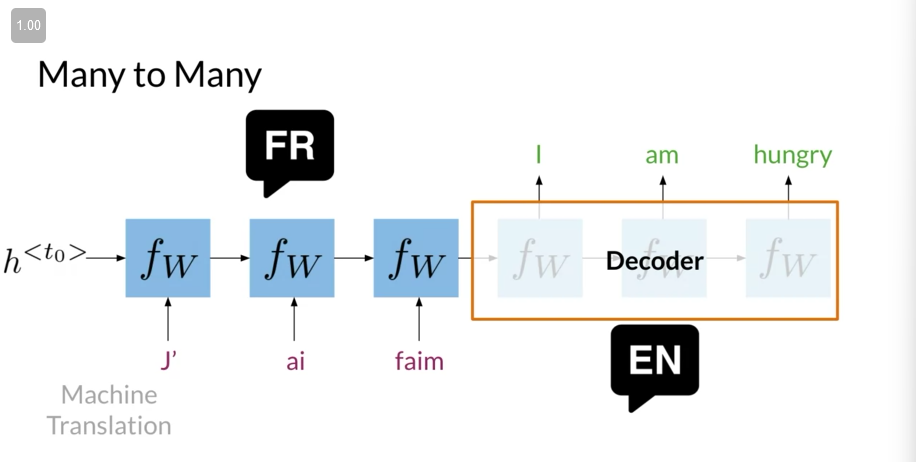

### Summary
- RNNs can be implemented for a variety of NLP tasks
- Applications include Machine translation and caption generation

In [4]:
# SECTION DIVIDER

## Math in Simple RNNs
### Outline
- How RNNs propagate information (Through time!)
- How RNNs make predictions

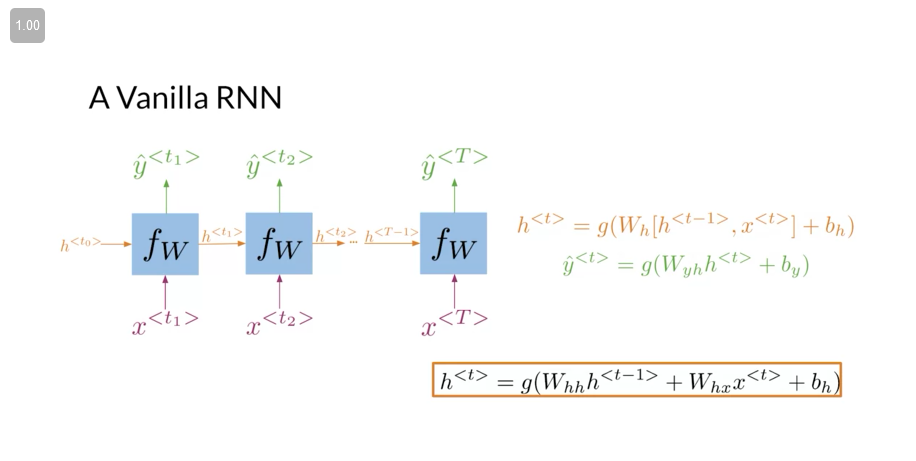

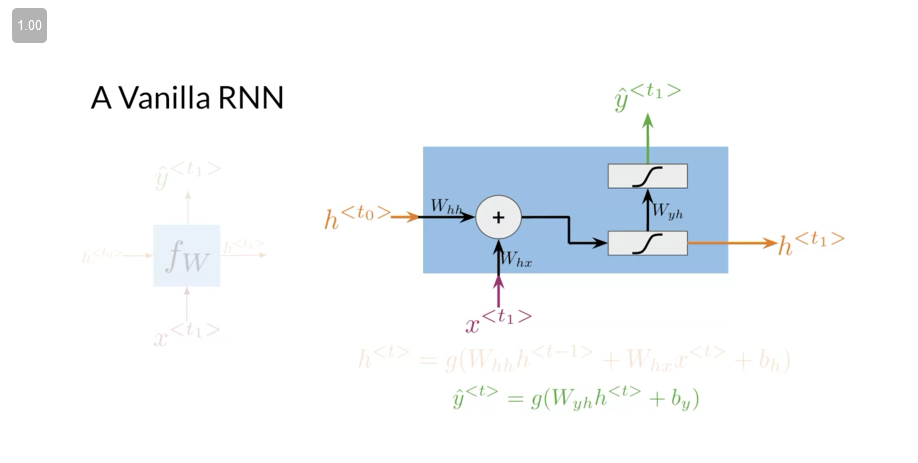

### Summary
- Hidden states propagate information through time
- Basic recurrent units have two inputs at each time: $h^{<t-1>}, x^{<t>}$

In [5]:
# SECTION DIVIDER

## Hidden State Activation Code

In [6]:
import numpy as np

In [13]:
# Joining (concatenation)
w_hh = np.full((3, 2), 1)
w_hx = np.full((3, 3), 9)

# Code for random initializations
# w_hh = np.random.standard_normal((3,2))
# w_hx = np.random.standard_normal((3,3))

print(f"w_hh:\n {w_hh}, Shape: {w_hh.shape}")
print(f"w_hx:\n {w_hx}, Shape: {w_hx.shape}")

# Joining the arrays
# Option 1: concatenate - horizonal
w_h1 = np.concatenate((w_hh, w_hx), axis=1)
# Option 2: hstack
w_h2 = np.hstack((w_hh, w_hx))

print(f"Option 1 (concatenate - horizontal):\n {w_h1}, Shape: {w_h1.shape}")
print(f"Option 2 (hstack):\n {w_h2}, Shape: {w_h2.shape}")

w_hh:
 [[1 1]
 [1 1]
 [1 1]], Shape: (3, 2)
w_hx:
 [[9 9 9]
 [9 9 9]
 [9 9 9]], Shape: (3, 3)
Option 1 (concatenate - horizontal):
 [[1 1 9 9 9]
 [1 1 9 9 9]
 [1 1 9 9 9]], Shape: (3, 5)
Option 2 (hstack):
 [[1 1 9 9 9]
 [1 1 9 9 9]
 [1 1 9 9 9]], Shape: (3, 5)


In [8]:
print(w_hh)

[[1 1]
 [1 1]
 [1 1]]


In [16]:
# Hidden state & inputs
h_t_prev = np.full((2, 1), 1)
x_t = np.full((3, 1), 9)

# Code for random initialization
# h_t_prev = np.random.standard_normal((2,1))
# x_t = np.random.standard_normal((3,1))

print(f"h_t_prev:\n {h_t_prev}, Shape: {h_t_prev.shape}")
print(f"h_t_prev:\n {x_t}, Shape: {x_t.shape}")

# Joining the arrays
# Option 1: concatenate - vertical
ax_1 = np.concatenate((h_t_prev, x_t), axis=0)
# Option 2: vstack
ax_2 = np.vstack((h_t_prev, x_t))

print(f"Option 1 (concatenate - vertical):\n {ax_1}, Shape: {ax_1.shape}")
print(f"Option 2 (vstack):\n {ax_2}, Shape: {ax_2.shape}")

h_t_prev:
 [[1]
 [1]], Shape: (2, 1)
h_t_prev:
 [[9]
 [9]
 [9]], Shape: (3, 1)
Option 1 (concatenate - vertical):
 [[1]
 [1]
 [9]
 [9]
 [9]], Shape: (5, 1)
Option 2 (vstack):
 [[1]
 [1]
 [9]
 [9]
 [9]], Shape: (5, 1)


In [24]:
# Verify formulas
w_hh = np.full((3, 2), 1)
w_hx = np.full((3, 3), 9)
h_t_prev = np.full((2, 1), 1)
x_t = np.full((3, 1), 9)

# Code to randomize the values
# w_hh = np.random.standard_normal((3,2))
# w_hx = np.random.standard_normal((3,3))
# h_t_prev = np.random.standard_normal((2,1))
# x_t = np.random.standard_normal((3,1))

# Formula 1
stack_1 = np.hstack((w_hh, w_hx))
stack_2 = np.vstack((h_t_prev, x_t))
formula_1 = np.matmul(stack_1, stack_2)
print(f"Formula 1:\n {formula_1}")

# Formula 2
mul_1 = np.matmul(w_hh, h_t_prev)
mul_2 = np.matmul(w_hx, x_t)
formula_2 = np.matmul(stack_1, stack_2)
print(f"Formula 2:\n {formula_2}")

# Verification
print("Results are the same:", np.allclose(formula_1, formula_2))

Formula 1:
 [[245]
 [245]
 [245]]
Formula 2:
 [[245]
 [245]
 [245]]
Results are the same: True


In [29]:
# Try adding a sigmoid activation function and bias term as a final check
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

b = np.random.standard_normal((formula_1.shape[0], 1))
print("Formula 1 Output:\n", sigmoid(formula_1 + b))
print("Formula 2 Output:\n", sigmoid(formula_2 + b))

all_close = np.allclose(sigmoid(formula_1 + b), sigmoid(formula_2 + b))
print("Results after activation are the same:", all_close)

Formula 1 Output:
 [[1.]
 [1.]
 [1.]]
Formula 2 Output:
 [[1.]
 [1.]
 [1.]]
Results after activation are the same: True


In [30]:
# SECTION DIVIDER

## Cost Function for RNNs

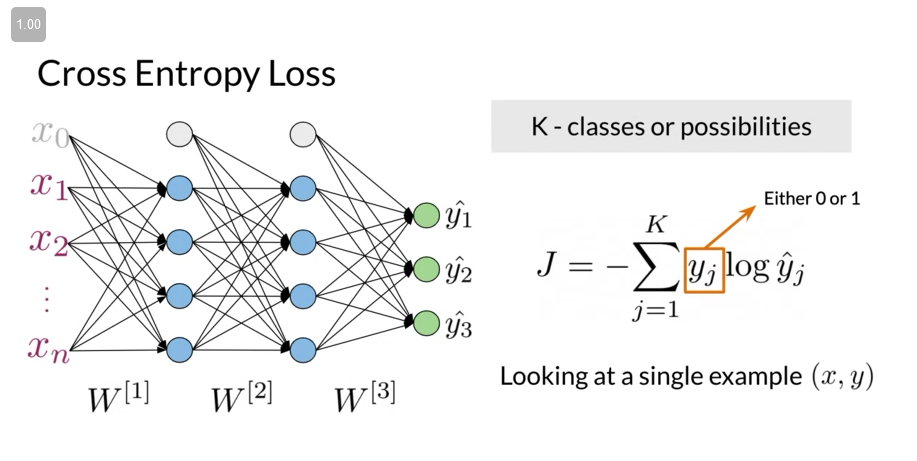

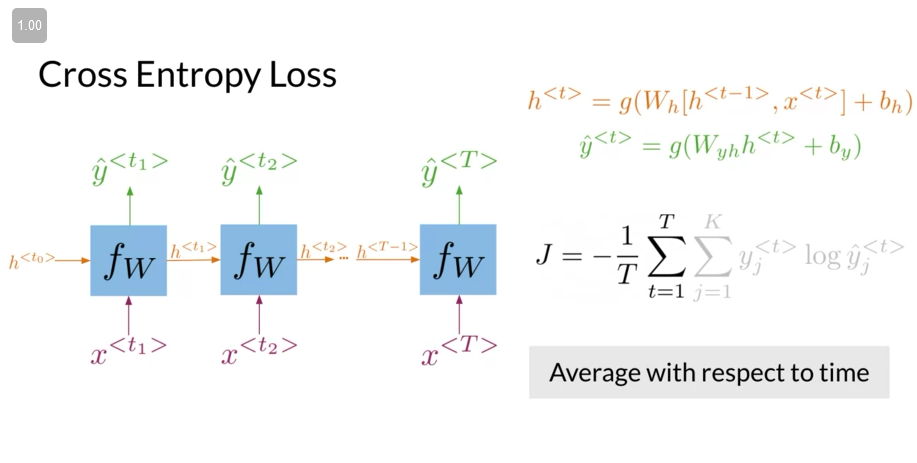

### Summary
For RNNs the loss function is just an average through time!

In [31]:
# SECTION DIVIDER

## Implementation Note
### Outline
- scan() function in tensorflow
- Computation of forward propagation using abstractions

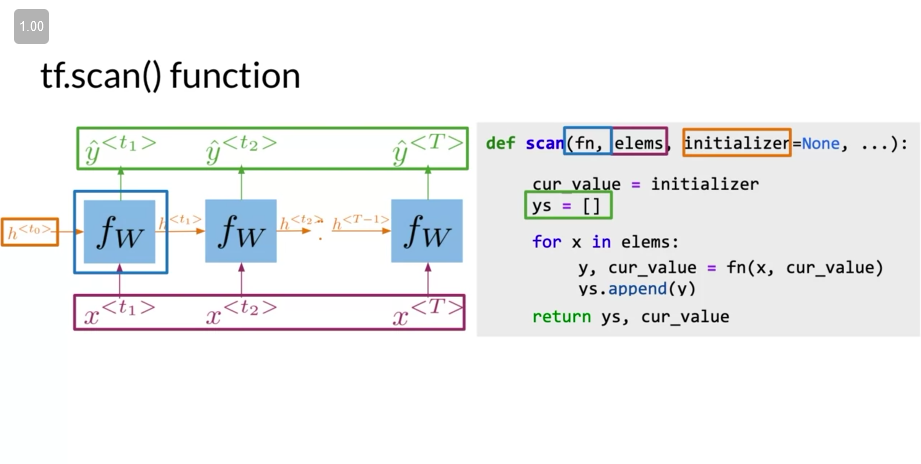

Frameworks like Tensorflow need this type of abstraction.

Parallel computations and GPU usage.

### Summary
- Frameworks require abstractions
- tf.scan() mimics RNNs

In [32]:
# SECTION DIVIDER

## Vanilla RNNs, GRUs and the `scan` function Code

In [33]:
import numpy as np
from numpy import random
from time import perf_counter

In [34]:
# Sigmoid function
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

In [35]:
# Forward method for vanilla RNNs and GRUs
random.seed(10)
emb = 128
T = 256
h_dim = 16
h_0 = np.zeros((h_dim, 1))

# Random initialization of weights and biases
w1 = random.standard_normal((h_dim, emb+h_dim))
w2 = random.standard_normal((h_dim, emb+h_dim))
w3 = random.standard_normal((h_dim, emb+h_dim))
b1 = random.standard_normal((h_dim, 1))
b2 = random.standard_normal((h_dim, 1))
b3 = random.standard_normal((h_dim, 1))
X = random.standard_normal((T, emb, 1))
weights = [w1, w2, w3, b1, b2, b3]

In [41]:
# Forward propagation for a single vanilla RNN cell
def forward_V_RNN(inputs, weights):
  x, h_t = inputs
  wh, _, _, bh, _, _ = weights

  # New hidden state
  h_t = np.dot(wh, np.concatenate([h_t, x])) + bh
  h_t = sigmoid(h_t)

  return h_t, h_t

In [42]:
# Forward propagation for a single GRU cell
def forward_GRU(inputs, weights):
  x, h_t = inputs
  wu, wr, wc, bu, br, bc = weights

  # Update gate
  u = np.dot(wu, np.concatenate([h_t, x])) + bu
  u = sigmoid(u)

  # Relevance gate
  r = np.dot(wr, np.concatenate([h_t, x])) + br
  r = sigmoid(r)

  # Candidate hidden state
  c = np.dot(wc, np.concatenate([r * h_t, x])) + br
  c = np.tanh(c)

  # New hidden state
  h_t = u * c + (1 - u) * h_t
  return h_t, h_t

In [40]:
forward_GRU([X[1], h_0], weights)[0]

array([[ 9.77247270e-01],
       [-9.97592734e-01],
       [-5.19847561e-01],
       [-9.99999859e-01],
       [-9.99704202e-01],
       [-3.02197037e-04],
       [-9.58733466e-01],
       [ 2.10804828e-02],
       [ 9.77365398e-05],
       [ 9.99834906e-01],
       [ 1.63200940e-08],
       [ 8.51874636e-01],
       [ 5.21399923e-02],
       [ 2.15495959e-02],
       [ 9.99876511e-01],
       [ 6.19027083e-01]])

In [43]:
# Forward propagation for RNNs
def scan(fn, elems, weights, h_0=None):
  h_t = h_0
  ys = []
  for x in elems:
    y, ht = fn([x, h_t], weights)
    ys.append(y)
  return ys, h_t

In [44]:
# Comparison between vanilla RNNs and GRUs
# Vanilla RNNs
tic = perf_counter()
ys, h_T = scan(forward_V_RNN, X, weights, h_0)
toc = perf_counter()
RNN_time = (toc-tic)*1000
print (f"It took {RNN_time:.2f}ms to run the forward method for the vanilla RNN.")

# GRUs
tic = perf_counter()
ys, h_T = scan(forward_GRU, X, weights, h_0)
toc = perf_counter()
GRU_time = (toc-tic)*1000
print (f"It took {GRU_time:.2f}ms to run the forward method for the GRU.")

It took 8.68ms to run the forward method for the vanilla RNN.
It took 12.09ms to run the forward method for the GRU.


In [45]:
# SECTION DIVIDER

## Working with JAX NumPy and Calculating Perplexity Code

In [61]:
from IPython.display import clear_output
!pip install trax
clear_output(wait=False)

In [62]:
import numpy
import trax
import trax.fastmath.numpy as np
from google.colab import files

uploaded = files.upload()
numpy.random.seed(32)

Saving predictions.npy to predictions (1).npy
Saving targets.npy to targets (1).npy


In [63]:
# Calculating perplexity
from trax import layers as tl

predictions = numpy.load('predictions.npy')
targets = numpy.load('targets.npy')

predictions = np.array(predictions)
targets = np.array(targets)

print(f'predictions has shape: {predictions.shape}')
print(f'targets has shape: {targets.shape}')

predictions has shape: (32, 64, 256)
targets has shape: (32, 64)


In [64]:
# Trax's one_hot function takes the input as one_hot(x, n_categories, dtype=optional)
reshaped_targets = tl.one_hot(targets, predictions.shape[-1])
print(f'reshaped_targets has shape: {reshaped_targets.shape}')

reshaped_targets has shape: (32, 64, 256)


In [65]:
log_p = np.sum(predictions * reshaped_targets, axis=-1)

In [66]:
non_pad = 1.0 - np.equal(targets, 0)
print(f'non_pad has shape: {non_pad.shape}\n')
print(f'non_pad looks like this: \n\n {non_pad}')

non_pad has shape: (32, 64)

non_pad looks like this: 

 [[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [67]:
real_log_p = log_p * non_pad
print(f'real log probabilities still have shape: {real_log_p.shape}')

real log probabilities still have shape: (32, 64)


In [68]:
print(f'log probabilities before filtering padding: \n\n {log_p}\n')
print(f'log probabilities after filtering padding: \n\n {real_log_p}')

log probabilities before filtering padding: 

 [[ -5.396545    -1.0311184   -0.66916656 ... -22.37673    -23.18771
  -21.843483  ]
 [ -4.5857706   -1.1341286   -8.538033   ... -20.15686    -26.837097
  -23.57502   ]
 [ -5.2223887   -1.2824144   -0.17312431 ... -21.328228   -19.854412
  -33.88444   ]
 ...
 [ -5.396545   -17.291681    -4.360766   ... -20.825802   -21.065838
  -22.443115  ]
 [ -5.9313164  -14.247417    -0.2637329  ... -26.743248   -18.38433
  -22.355278  ]
 [ -5.670536    -0.10595131   0.         ... -23.332523   -28.087376
  -23.878807  ]]

log probabilities after filtering padding: 

 [[ -5.396545    -1.0311184   -0.66916656 ...  -0.          -0.
   -0.        ]
 [ -4.5857706   -1.1341286   -8.538033   ...  -0.          -0.
   -0.        ]
 [ -5.2223887   -1.2824144   -0.17312431 ...  -0.          -0.
   -0.        ]
 ...
 [ -5.396545   -17.291681    -4.360766   ...  -0.          -0.
   -0.        ]
 [ -5.9313164  -14.247417    -0.2637329  ...  -0.          -0.
   -0.  

In [69]:
log_ppx = np.sum(real_log_p, axis=1) / np.sum(non_pad, axis=1)
log_ppx = np.mean(-log_ppx)
print(f'The log perplexity and perplexity of the model are respectively: {log_ppx} and {np.exp(log_ppx)}')

The log perplexity and perplexity of the model are respectively: 2.621185302734375 and 13.75201416015625


In [70]:
# SECTION DIVIDER

## Gated Recurrent Units
### Outline
- Gated recurrent unit (GRU) structure
- Comparison between GRUs and vanilla RNNs

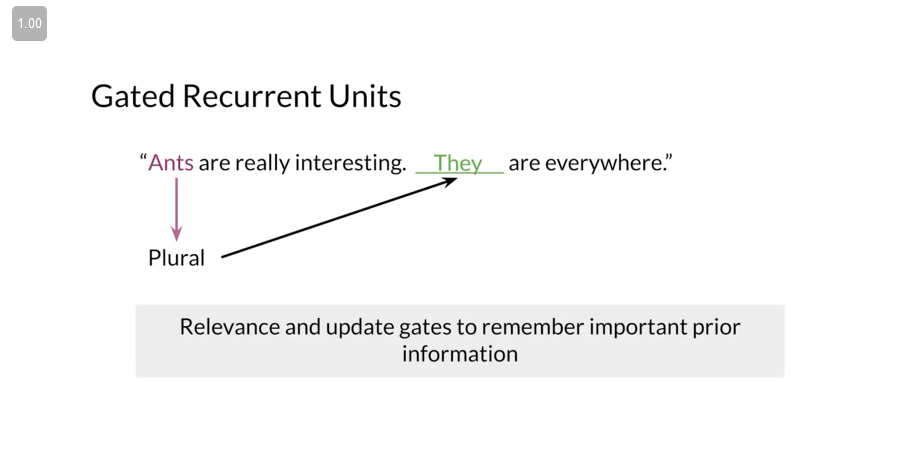

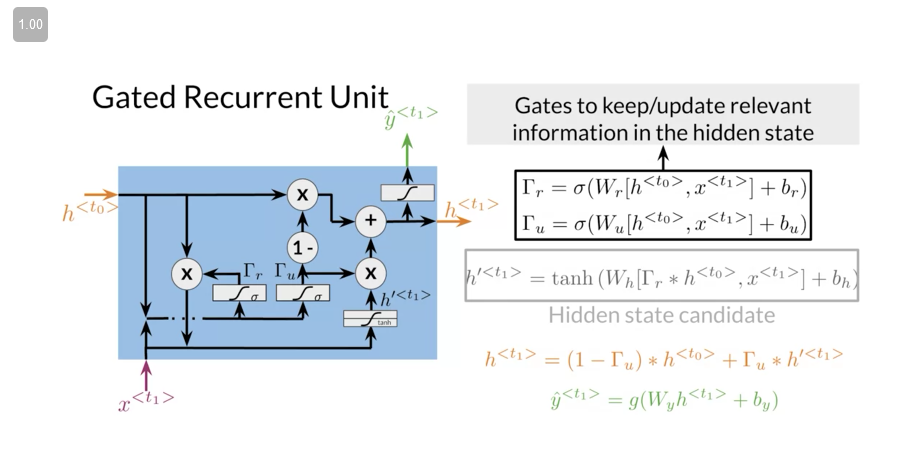

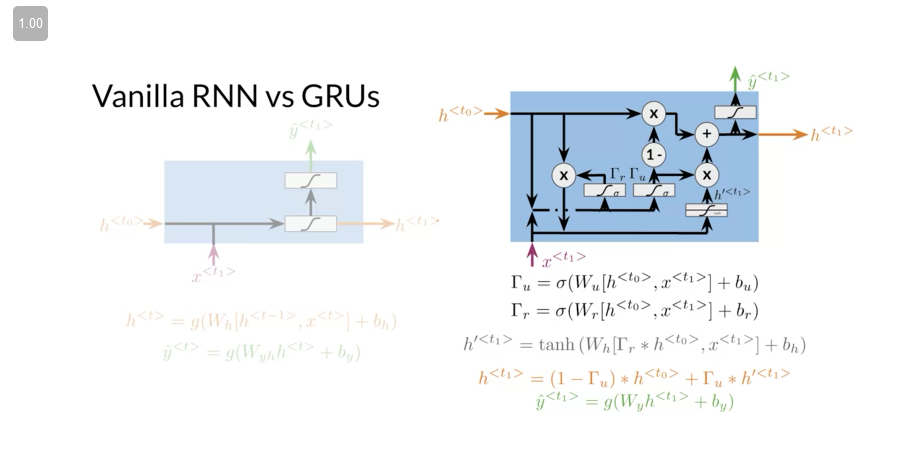

### Summary
- GRUs "decide" how to update the hidden state
- GRUs help preserve important information

In [71]:
# SECTION DIVIDER

## Creating a GRU model using Trax Code

In [72]:
import trax
from trax import layers as tl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
mlp = tl.Serial(
    tl.Dense(128),
    tl.Relu(),
    tl.Dense(10),
    tl.LogSoftmax()
)

print(mlp)

Serial[
  Dense_128
  Serial[
    Relu
  ]
  Dense_10
  LogSoftmax
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# GRU Model
mode = 'train'
vocab_size = 256
model_dimension = 512
n_layers = 2

GRU = tl.Serial(
    tl.ShiftRight(mode=mode),
    tl.Embedding(vocab_size=vocab_size, d_feature=model_dimension),
    [tl.GRU(n_units=model_dimension) for _ in range(n_layers)],
    tl.Dense(n_units=vocab_size),
    tl.LogSoftmax()
)

In [77]:
# Helper function
def show_layers(model, layer_prefix="Serial.sublayers"):
    print(f"Total layers: {len(model.sublayers)}\n")
    for i in range(len(model.sublayers)):
        print('========')
        print(f'{layer_prefix}_{i}: {model.sublayers[i]}\n')

show_layers(GRU)

Total layers: 6

Serial.sublayers_0: Serial[
  ShiftRight(1)
]

Serial.sublayers_1: Embedding_256_512

Serial.sublayers_2: GRU_512

Serial.sublayers_3: GRU_512

Serial.sublayers_4: Dense_256

Serial.sublayers_5: LogSoftmax



In [78]:
# SECTION DIVIDER

## Deep and Bi-directional RNNs
### Outline
- How bidirectional RNNs propagate information
- Forward propagation in deep RNNs

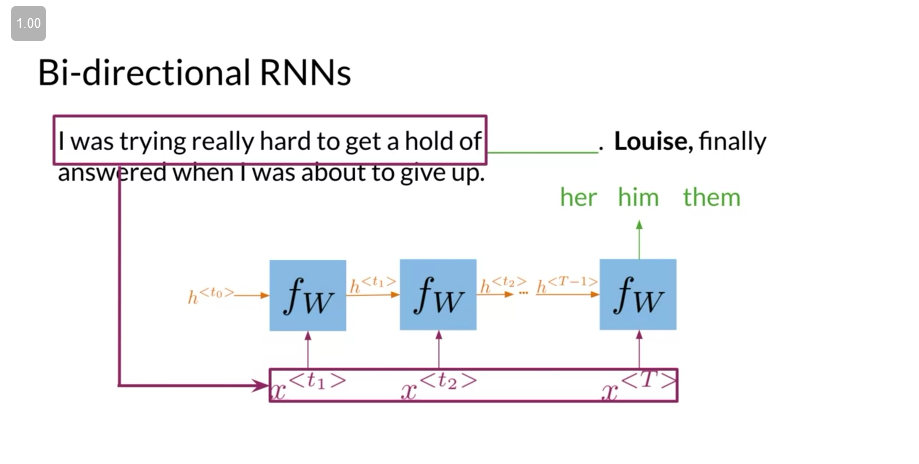

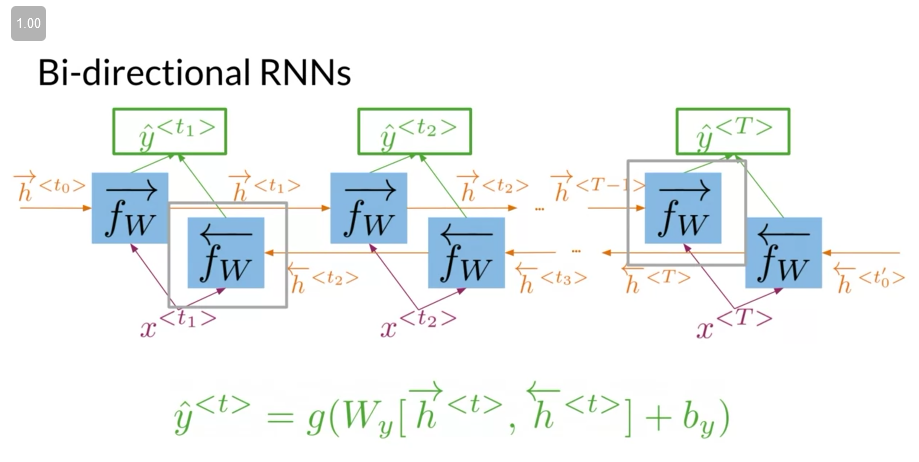

Information flows from the past and from the future **independently**

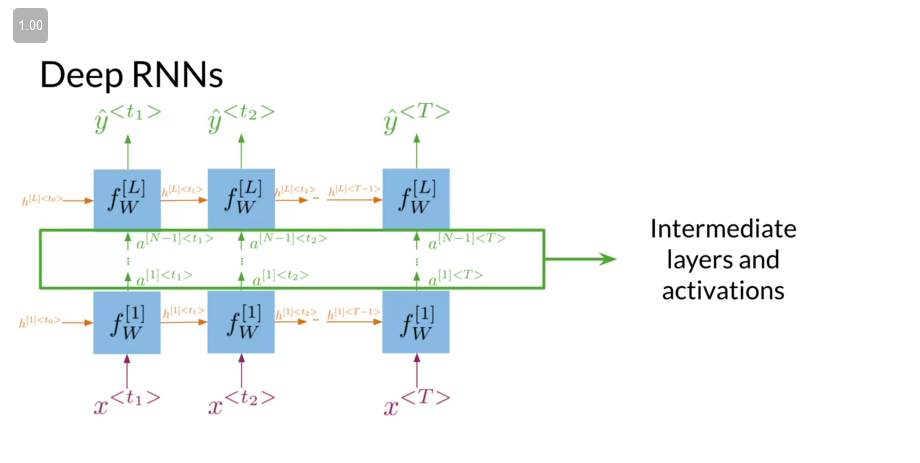

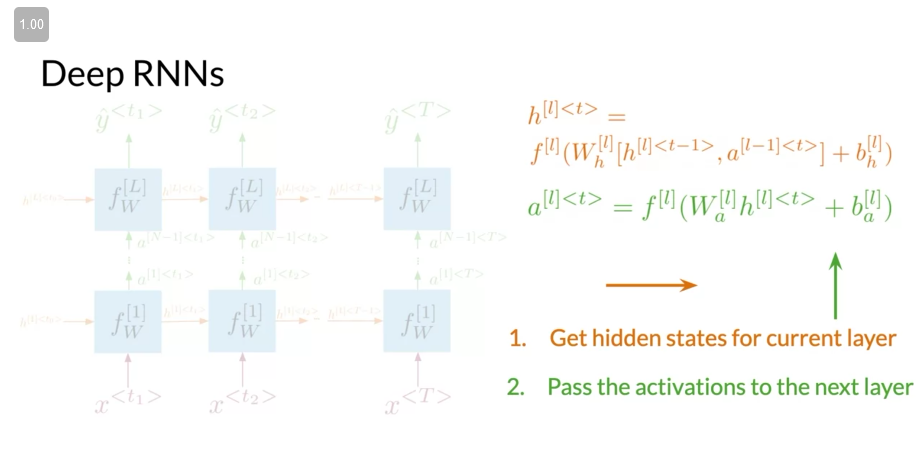

### Summary
- In bidirectional RNNs, the outputs take information from the past and the future
- Deep RNNs have more than one layer, which helps in complex tasks

In [79]:
# SECTION DIVIDER

## Deep N-grams